# PCA with Diabetes

## 1. 데이터 불러오기

In [11]:
import pandas as pd

df= pd.read_csv(r"C:\Users\DoHyeonjik\GachonUniv\3-2\datasets\DL\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
# 특성 보기
print(df.columns)
# 구조 보기
print(df.shape)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(768, 9)


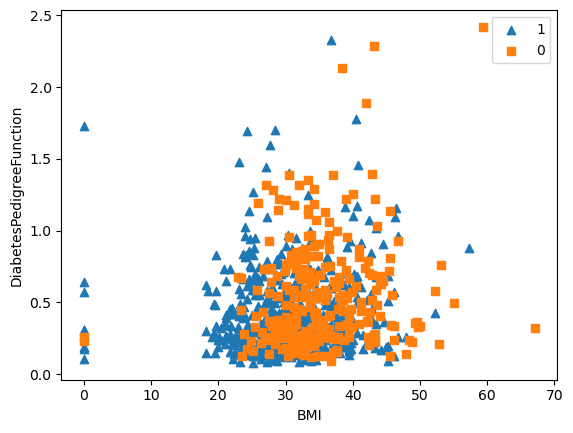

In [13]:
# 각 클래스 별 데이터 분포 시각화
import matplotlib.pyplot as plt

markers=['^', 's']

for i, marker in enumerate(markers):
    x_ = df[df['Outcome']==i]['BMI']
    y_ = df[df['Outcome']==i]['DiabetesPedigreeFunction']
    plt.scatter(x_, y_, marker=marker, label=df['Outcome'][i])

plt.legend()
plt.xlabel('BMI')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()
    

두가지 특성(BMI와 DiabetesPedigreeFunction)을 이용하여 데이터 분포를 확인  
  
두가지 특성만 확인해본 결과 클래스 별로 분포가 섞여있어서 두 특성으로는 클래스 구분이 힘들듯
  
이런식으로 상관관계가 높은 특성들 끼리 새로운 축으로 묶어서 표현하는 것을 PCA라고 함

## 2. 데이터 전처리

In [14]:
#데이터와 레이블로 분리
df_data = df.drop('Outcome', axis=1)
print(df_data.head())
df_label = df['Outcome']
print(df_label.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [15]:
# 훈련세트와 테스트 세트로 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data, df_label, test_size=0.2, random_state=42)
x_train = x_train.values
x_test = x_test.values
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [16]:
# 주성분 분석을 위한 정규화 진행
## PCA는 정규화가 필수임
## 정규화를 하지 않으면 PCA가 잘못된 주성분을 선택할 수 있음
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

## 3. PCA


In [105]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(x_train_scaled)
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

분산 비율 : [0.25533281 0.22070281 0.12800509 0.11125003 0.09715756 0.08800606]


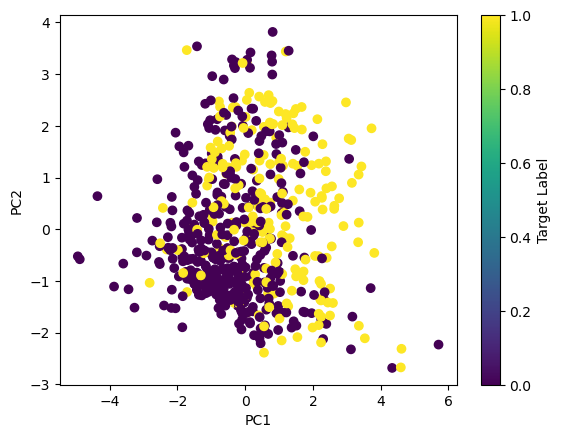

In [106]:
# 시각화
## n값을 4로 해보니깐 각 주성분들의 분산의 총합이 71로 너무 작았음
## 분류, 회귀, AE 등에 사용하려면 최소 80은 넘어야 될 거 같았음

x_pca_df = pd.DataFrame(x_train_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
print("분산 비율 :", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

plt.scatter(x_pca_df['PC1'], x_pca_df['PC2'], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Target Label')
plt.show()
                        

In [107]:
x_train_pca.shape

(614, 6)

## 4. 모델 생성 및 훈련
_________________
### 4-1) 분류


In [108]:
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

model1 = Sequential()

# model1.add(Dense(128, input_shape=(6,), activation='relu'))
model1.add(Dense(64, input_shape=(6,), activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model1.summary()

C:\Users\DoHyeonjik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                     │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
history = model1.fit(x_train_pca, y_train, epochs=20, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.5754 - loss: 0.6784 - val_acc: 0.6774 - val_loss: 0.6329
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7063 - loss: 0.5989 - val_acc: 0.6774 - val_loss: 0.6114
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6913 - loss: 0.5669 - val_acc: 0.7097 - val_loss: 0.5703
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7295 - loss: 0.5137 - val_acc: 0.7258 - val_loss: 0.5273
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7339 - loss: 0.5075 - val_acc: 0.6935 - val_loss: 0.5070
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7680 - loss: 0.4736 - val_acc: 0.7419 - val_loss: 0.4891
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7638 - loss: 0.4655 - val_acc: 0.7258 - val_loss: 0.4789
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7672 - loss: 0.4957 - val_acc: 0.7258 - val_loss: 0.4784
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7642 - loss:

[]

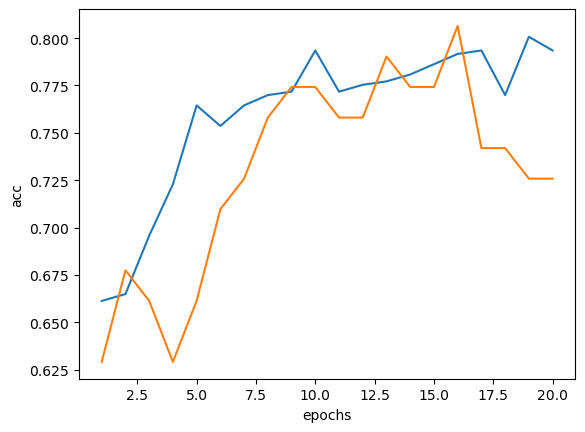

In [76]:
epochs = range(1, 21)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot()

In [77]:
model1.evaluate(x_test_pca, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7185 - loss: 0.5426 


[0.5308345556259155, 0.7532467246055603]

### <분류 : 결과>
- 드롭아웃 규제를 적용하긴 했지만 2주차에 진행한 분류 모델보다 훨신 더 높은 훈련 정확도
- 과대적합 문제도 일부 해결함
